# **Twitter Sentiment Analysis - "Pepsi Vs Coke"**

## Submitted by-

Dhananjay Singh

Shivani Narahari

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/tweets.csv")
df.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,CdnOrgC,"Will mostly tweet links to articles (EN, FR, I...",NaN,2221,2209,11689,2013-09-11 20:53:06+00:00,2022-03-18 07:09:29+00:00,0,@ZFTWARNING @coretti_luigi @VFelbabBrown Thank...,"[{'text': 'Winnipeg', 'indices': [111, 120]}, ..."
1,RBTradingPTDE,NaN,"Las Vegas, NV",5,14,1171,2022-01-17 07:29:01+00:00,2022-03-18 07:07:07+00:00,0,$Cei Camber Energy 👀 OIL $ Gas 🚨\n#Siemens #B...,"[{'text': 'Siemens', 'indices': [34, 42]}, {'t..."
2,carbonateddave,Pepsi is the best,NaN,9,6,4471,2019-05-14 21:49:49+00:00,2022-03-18 06:54:11+00:00,0,Pepsi drinkers are the commander of the soccer...,"[{'text': 'pepsi', 'indices': [54, 60]}]"
3,3drenderbot,I retweet 3d related stuff. You can request ne...,The Web,4,6304,273229,2015-10-19 07:24:59+00:00,2022-03-18 06:39:03+00:00,1,Modeling and Rendering of Consumer Product \n(...,"[{'text': 'autodeskfusion360', 'indices': [84,..."
4,akonml,Engineering Student || CAD Expert || Freelance...,Nigeria,493,293,834,2018-02-22 10:26:43+00:00,2022-03-18 06:35:01+00:00,1,Modeling and Rendering of Consumer Product \n(...,"[{'text': 'autodeskfusion360', 'indices': [72,..."


In [ ]:
#importing necessary libraries
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
import re
nltk.download('stopwords')
import itertools
import string
import collections
from collections import Counter
import os
import re
import sys
import time
import json
import string

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#function to clean the text column
def data_preprocess(data):
    stop = stopwords.words('english')
    #remove urls 
    data["text"] = data["text"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    #remove punctation
    data["text"] = data["text"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #remove multiple fullstops
    data["text"] = data["text"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    data["text"] = data["text"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #convert to lowercase
    data["text"] = data["text"].apply(lambda x: x.lower())

    #remove multiple letter repeating words
    data["text"] = data["text"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #remove very short or long words
    data["text"] = data["text"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    data["text"] = data["text"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))
    
    #remove stop words
    data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

    #remove non english words
    data['text'] = data['text'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))
    
    return data

df_clean = data_preprocess(df)


In [ ]:
df_clean.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,CdnOrgC,"Will mostly tweet links to articles (EN, FR, I...",NaN,2221,2209,11689,2013-09-11 20:53:06+00:00,2022-03-18 07:09:29+00:00,0,thank link provided news article coke cocaine,"[{'text': 'Winnipeg', 'indices': [111, 120]}, ..."
1,RBTradingPTDE,NaN,"Las Vegas, NV",5,14,1171,2022-01-17 07:29:01+00:00,2022-03-18 07:07:07+00:00,0,camber energy delivery brand puma,"[{'text': 'Siemens', 'indices': [34, 42]}, {'t..."
2,carbonateddave,Pepsi is the best,NaN,9,6,4471,2019-05-14 21:49:49+00:00,2022-03-18 06:54:11+00:00,0,commander soccer field,"[{'text': 'pepsi', 'indices': [54, 60]}]"
3,3drenderbot,I retweet 3d related stuff. You can request ne...,The Web,4,6304,273229,2015-10-19 07:24:59+00:00,2022-03-18 06:39:03+00:00,1,modeling rendering consumer product energy dri...,"[{'text': 'autodeskfusion360', 'indices': [84,..."
5,BeehiveChina,Whimsical perspectives from a happy life in Ch...,China,2234,1018,8512,2011-06-15 13:41:41+00:00,2022-03-18 06:34:24+00:00,1,spoof account post devastation grief puppet fi...,"[{'text': 'Ukraine', 'indices': [53, 61]}]"


In [ ]:
#dropping variables
df_clean.drop(['acctdesc', 'location','following','followers','totaltweets','usercreatedts','tweetcreatedts','retweetcount','hashtags'],axis=1,inplace=True)
df_clean.head()

,username,text
0,CdnOrgC,thank link provided news article coke cocaine
1,RBTradingPTDE,camber energy delivery brand puma
2,carbonateddave,commander soccer field
3,3drenderbot,modeling rendering consumer product energy dri...
5,BeehiveChina,spoof account post devastation grief puppet fi...


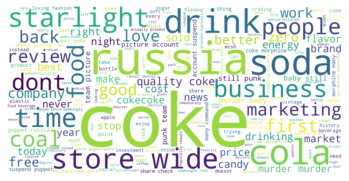

In [ ]:
#wordcloud of the tweets column
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc=WordCloud(background_color="white",width=2000,height=1000).generate(''.join(df_clean["text"]))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#converting dataframe to a text file
df_clean.to_csv(r'/content/drive/MyDrive/Big_Data_Project/tweet.txt', header=None, index=None, sep='\t', mode='a')

In [ ]:
#defining our sentiments dictionary
sentiment_Dictionary = {'positive': {}, 'negative': {}}

In [ ]:
#defining function to load the positive and negative bag of words
def load_Sentiments():
    with open('/content/drive/MyDrive/Big_Data_Project/positive-words.txt', 'r', encoding = "ISO-8859-1") as posFile:
        for line in posFile:
            sentiment_Dictionary['positive'][line.strip()] = 1

    with open('/content/drive/MyDrive/Big_Data_Project/negative-words.txt', 'r', encoding = "ISO-8859-1") as negFile:
        for line in negFile:
            sentiment_Dictionary['negative'][line.strip()] = 1

In [ ]:
with open('/content/drive/MyDrive/Big_Data_Project/tweet.txt', 'r') as file:
  for line in file:
    a = line.split('\t')
    print(a[0])

Streaming output truncated to the last 5000 lines.
amietorii
mahhhhnnn
Hafsert_
GeniusDalat
synthesee
peebutt420
GeniusDalat
Londonb11021409
Icekidanu
GeniusDalat
pepsi
Only_samson
_Ms_Chanandler_
BIGdrakerr
robotmae3000
horlahhmighty
tushy43
iamwizzyice
mahhhhnnn
DaKiryuKazuma
__Daviee_
tushy43
Only_samson
chiefmarcus_
som_ego1
emmanuel_ujiri
mahhhhnnn
horlahhmighty
lakes_xo_
MCOtutu1
mahhhhnnn
orkeney
AyodeleAliu2
tushy43
princekiddie
eillo21
horlahhmighty
tushy43
lakes_xo_
centralceeMusic
Epe35
maureenlala33
TaiwoOyindun
_dESIVERY_
DoTanSang5
Junk1eJesus
chalpo_el
BigMan_Xander
Altair7500
chiefmarcus_
SeniormanTravis
AbbeybolaG
Only_samson
RewindMzansi
s1mpleO
BAHDBOYSTINE
shinazx30
BigMan_Xander
joeslaughtercs
BAHDBOYSTINE
SeniormanTravis
ellora_sutton
tush_anita
BAHDBOYSTINE
tonzaFIN
__Daviee_
uaw_miles
tush_anita
markmode
horlahhmighty
s1mpleO
JarmenkeII
marthamarsh53
tush_anita
theamandachinda
Only_samson
witchyhellbroth
ayo_olah
Only_samson
Obrien1639
DRFHarness
RuleZeroLondon


In [ ]:
# Defining the Mapper function
def mapper():
    mo=open('/content/drive/MyDrive/Big_Data_Project/mapperoutput.txt', 'w')
    load_Sentiments()
    with open('/content/drive/MyDrive/Big_Data_Project/tweet.txt', 'r') as mapperfile:
      for twt_Obj in mapperfile:

        twt_Obj = twt_Obj.split('\t')
        userId = twt_Obj[0]
        
        twt_Txt = twt_Obj[1]
        
        words = {}
        for w in twt_Txt.split():
            if len(w) > 0:
                words[w] = 1

        counts = {'positive': 0, 'negative': 0}
        ratios = {'positive': 0, 'negative': 0}
        length_Tweet = len(words)

        for key in ['coke', 'pepsi']:
            if key in twt_Txt:
                for s in ['positive', 'negative']:
                    for i in sentiment_Dictionary[s].keys():
                        if i in words:
                            counts[s] += 1

                    ratios[s] = counts[s] / length_Tweet
                mo.writelines('\t'.join([userId, key, str(ratios['positive'] - ratios['negative']),'\n']))
                  
          
                

      

In [ ]:
mapper()

In [ ]:
#importing all necessary modules
from operator import itemgetter
import sys
import csv

# Defining the Reducer function
def reducer():
    coke_average = 0.0
    coke_tot = 0
    pepsi_average = 0.0
    pepsi_tot = 0
    with open('/content/drive/MyDrive/Big_Data_Project/mapperoutput.txt', 'r') as reducerfile:
      for line in reducerfile:
        #line = line.strip()
        row = line.split('\t')
        key = row[1]
        avg = row[2]

        try:
            avg = float(avg)
        except:
            continue

        if key == 'coke':
            coke_average += avg
            coke_tot += 1

        if key == 'pepsi':
            pepsi_average += avg
            pepsi_tot += 1

    print ('Total avg score of products\n')
    print ('%s\t%.4f' % ('coke', coke_average / coke_tot))
    print ('%s\t%.4f' % ('pepsi', pepsi_average / pepsi_tot))
    return coke_average / coke_tot, pepsi_average / pepsi_tot



In [ ]:
ct, pt = reducer()

Total avg score of products

coke	0.0166
pepsi	0.0266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


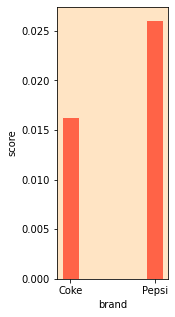

In [ ]:
#Visualizing scores
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
fig = plt.figure(figsize = (2, 5))
brand = ['Coke', 'Pepsi']
score = [ct,pt]
plt.bar(brand, score, color ='tomato', edgecolor="bisque",
        width = 0.2)
plt.xlabel("brand")
plt.ylabel("score")
ax = plt.axes()
ax.set_facecolor("bisque")
#plt.title("score - coke vs pepsi")
plt.show()